In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv, os
from datetime import datetime
from IPython.core.display import Image

# We can display plots in the notebook using this line of code
%matplotlib inline

# Optional Task
You've been given the problem of **detecting fraudulent banknotes**. You come across a dataset detailing image sensor data for banknotes. 

Let's see if we can build a model that detects if a banknote is fraudulent. 

More information can be found [here](https://archive.ics.uci.edu/ml/datasets/banknote+authentication).

In [51]:
os.listdir()
os.getcwd()
os.chdir('D:\\William\\Jupyter\\2018\\Diagnosing_models-master\\data')

In [52]:
banknotes_data = pd.read_csv('banknotes_X.csv')
banknotes_labels = pd.read_csv('banknotes_y.csv')

In [53]:
def dropbadcol(df):
    if 'Unnamed: 0' in df.columns:
        df.drop(['Unnamed: 0'] , axis = 1 , inplace= True)
    print (df.head(3))
    return df

In [54]:
banknotes_labels.head(5)

,Unnamed: 0,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [55]:
banknotes_data.columns

Index(['Unnamed: 0', 'variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

In [56]:
banknotes_data = dropbadcol(banknotes_data)
banknotes_labels = dropbadcol(banknotes_labels)

   variance  skewness  curtosis  entropy
0    4.5459    8.1674   -2.4586 -1.46210
1    3.8660   -2.6383    1.9242  0.10645
2    3.4566    9.5228   -4.0112 -3.59440
   label
0      0
1      0
2      0


### Data Source:
Owner of database: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe, volker.lohweg '@' hs-owl.de) 
Donor of database: Helene DÃ¶rksen (University of Applied Sciences, Ostwestfalen-Lippe, helene.doerksen '@' hs-owl.de) 
Date received: August, 2012 

#### Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

#### Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 


In [57]:
#Check check just in case:
print (banknotes_data.describe() , '\n' , banknotes_labels.describe())

          variance     skewness     curtosis      entropy
count  1371.000000  1371.000000  1371.000000  1371.000000
mean      0.431410     1.917434     1.400694    -1.192200
std       2.842494     5.868359     4.310105     2.101683
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.774700    -1.711300    -1.553350    -2.417000
50%       0.495710     2.313400     0.616630    -0.586650
75%       2.814650     6.813100     3.181600     0.394810
max       6.824800    12.951600    17.927400     2.449500 
              label
count  1371.000000
mean      0.444931
std       0.497139
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


In [58]:
from sklearn.model_selection import train_test_split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(banknotes_data, banknotes_labels, test_size=0.33, random_state=420)

In [59]:
from sklearn.linear_model import LogisticRegression
### Code here
logreg = LogisticRegression()
logreg.fit(X_train_class , y_train_class ) 
y_pred_class = logreg.predict(X_test_class)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       248
          1       0.98      1.00      0.99       205

avg / total       0.99      0.99      0.99       453



In [61]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test_class, y_pred_class))

[[243   5]
 [  1 204]]


In [62]:
from sklearn.metrics import accuracy_score
final_idea_accuracy = accuracy_score(y_test_class, y_pred_class)
print('Final model accuracy- {}'.format(final_idea_accuracy))

Final model accuracy- 0.9867549668874173


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7)
results = cross_val_score(logreg, X_train_class , y_train_class , cv=kfold, scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.991


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

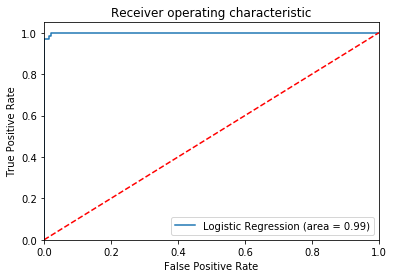

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_class, y_pred_class)
fpr, tpr, thresholds = roc_curve(y_test_class, logreg.predict_proba(X_test_class)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [65]:
Errorexam = X_test_class
Errorexam['Y_prob'] = logreg.predict_proba(X_test_class)[:,1]
Errorexam['Y_true'] = y_test_class
Errorexam['Y_pred'] = y_pred_class
Errorexam['wrongflag'] = "Correct"
#Errorexam.iloc[[Errorexam['Y_true'] != Errorexam['Y_pred']] , ['wrongflag']] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [67]:
Errorexam

,variance,skewness,curtosis,entropy,Y_prob,Y_true,Y_pred,wrongflag
149,4.54470,8.22740,-2.416600,-1.587500,9.780730e-09,0,0,Correct
876,-5.12160,-5.31180,10.384600,-1.061200,9.972530e-01,1,1,Correct
45,2.08430,6.62580,0.483820,-2.213400,5.128037e-07,0,0,Correct
630,1.89940,0.97462,4.226500,0.813770,3.884225e-06,0,0,Correct
1192,-3.75730,-8.29160,10.303200,0.380590,9.990493e-01,1,1,Correct
812,-2.13330,1.56850,-0.084261,-1.745300,9.988442e-01,1,1,Correct
272,2.69460,6.79760,-0.403010,0.449120,2.382474e-07,0,0,Correct
1228,0.23874,2.08790,-3.352200,-0.665530,9.959039e-01,1,1,Correct
1169,-0.34890,3.19290,-3.405400,-3.183200,9.972112e-01,1,1,Correct
594,3.18360,7.23210,-1.071300,-2.590900,1.987308e-07,0,0,Correct


In [68]:
Errorexam.loc[(Errorexam['Y_true'] != Errorexam['Y_pred']) , 'wrongflag'] = "Incorrect"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [79]:
Errorexam.groupby(['wrongflag','Y_true'])['Y_prob' ,'Y_pred'].describe()

Y_prob                                                  \
                  count      mean       std           min           25%   
wrongflag Y_true                                                          
Correct   0       243.0  0.003769  0.028793  1.403477e-09  6.380945e-07   
          1       204.0  0.973142  0.066330  5.234192e-01  9.835439e-01   
Incorrect 0         5.0  0.728164  0.035946  6.638621e-01  7.442400e-01   
          1         1.0  0.431942       NaN  4.319416e-01  4.319416e-01   

                                               Y_pred                      \
                       50%       75%       max  count mean  std  min  25%   
wrongflag Y_true                                                            
Correct   0       0.000004  0.000034  0.328714  243.0  0.0  0.0  0.0  0.0   
          1       0.997232  0.999410  0.999993  204.0  1.0  0.0  1.0  1.0   
Incorrect 0       0.744240  0.744240  0.744240    5.0  1.0  0.0  1.0  1.0   
          1       0.431942  0.431942  0.431942    1.0  0.0  NaN  0.0  0.0   

                                 
                  50%  75%  max  
wrongflag Y_true                 
Correct   0       0.0  0.0  0.0  
          1       1.0  1.0  1.0  
Incorrect 0       1.0  1.0  1.0  
          1       0.0  0.0  0.0